# Other ways

In [ ]:
import scipy.io


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive'

Hoda = scipy.io.loadmat('Data_hoda_full.mat')

/content/drive/My Drive


In [ ]:
from ast import main
import numpy as np

# Assuming you have the data stored in a file named 'hoda_data_full.npz'
# Make sure the file is in the same directory as your Python script or provide the correct path.

# Step 1: Load the data
Data = Hoda['Data']
labels = Hoda['labels']

# Step 2: Separate the data
main_data_cells = Data[:4000]
main_labels = labels[:4000]

train_labels=main_labels[:3000]
test_labels=main_labels[3000:4000]


In [ ]:
# Step 1: Find maximum height and maximum width
max_height = max(np.max(main_data_cells[i][0].shape[0]) for i in range(main_data_cells.shape[0]))
max_width = max(np.max(main_data_cells[i][0].shape[1]) for i in range(main_data_cells.shape[0]))
print(max_height)
print(max_width)



54
45


In [ ]:
import numpy as np

# Assuming you have loaded your data into 'Data' and 'labels' arrays
# Assuming each element of Data is a cell containing an array

# Step 2: Initialize an array to store centralized images
max_height = 0
max_width = 0

# Step 3: Centerize the images

for i in range(4000):
    max_height = max(max_height, main_data_cells[i][0].shape[0])
    max_width = max(max_width, main_data_cells[i][0].shape[1])

centered_main_data = np.zeros((4000, max_height, max_width), dtype=np.uint8)

for i in range(4000):
    h_offset = (max_height - main_data_cells[i][0].shape[0]) // 2
    w_offset = (max_width - main_data_cells[i][0].shape[1]) // 2
    centered_main_data[i, h_offset:h_offset+main_data_cells[i][0].shape[0], w_offset:w_offset+main_data_cells[i][0].shape[1]] = main_data_cells[i][0]

centered_train_data=centered_main_data[:3000]
centered_test_data=centered_main_data[3000:4000]


# Now, 'centered_train_data' and 'centered_test_data' contain the centralized images.


In [ ]:
def zoning_feature_extraction(image):
    # Assuming 'image' is a 2D array representing an image
    h, w = image.shape
    mid_h, mid_w = h // 2, w // 2

    # Divide the image into four zones
    top_left_zone = image[:mid_h, :mid_w]
    top_right_zone = image[:mid_h, mid_w:]
    bottom_left_zone = image[mid_h:, :mid_w]
    bottom_right_zone = image[mid_h:, mid_w:]

    # Calculate mean intensity for each zone
    mean_top_left = np.mean(top_left_zone)
    mean_top_right = np.mean(top_right_zone)
    mean_bottom_left = np.mean(bottom_left_zone)
    mean_bottom_right = np.mean(bottom_right_zone)

    # Return the features as a list
    features = [mean_top_left, mean_top_right, mean_bottom_left, mean_bottom_right]

    return features

def zoning_feature_extraction2(image):
    h, w = image.shape
    num_rows = 5
    num_cols = 5
    step_h = h // num_rows
    step_w = w // num_cols

    features = []

    for i in range(num_rows):
        for j in range(num_cols):
            zone = image[i*step_h:(i+1)*step_h, j*step_w:(j+1)*step_w]
            mean_intensity = np.mean(zone)
            features.append(mean_intensity)

    return features

# Example usage for one image
image_features = zoning_feature_extraction2(centered_train_data[0])
print(image_features)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 70.83333333333333, 14.166666666666666, 48.166666666666664, 0.0, 0.0, 79.33333333333333, 167.16666666666666, 14.166666666666666, 0.0, 0.0, 34.0, 70.83333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
def vertical_histogram_feature_extraction(image):
    # Assuming 'image' is a 2D array representing an image
    vertical_histogram = np.sum(image, axis=0)
    return vertical_histogram.tolist()

def horizontal_histogram_feature_extraction(image):
    # Assuming 'image' is a 2D array representing an image
    horizontal_histogram = np.sum(image, axis=1)
    return horizontal_histogram.tolist()

# Example usage for one image
vertical_histogram = vertical_histogram_feature_extraction(centered_train_data[0])
horizontal_histogram = horizontal_histogram_feature_extraction(centered_train_data[0])

print("Vertical Histogram:")
print(vertical_histogram)

print("\nHorizontal Histogram:")
print(horizontal_histogram)


Vertical Histogram:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1530, 2550, 2805, 2295, 3060, 4335, 4335, 3825, 3060, 2550, 2295, 1785, 1785, 1530, 1530, 1530, 1530, 1275, 1020, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Horizontal Histogram:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 510, 1020, 1785, 2295, 2040, 2040, 2295, 2040, 2550, 2550, 3825, 3570, 3060, 2295, 1275, 1020, 1275, 1020, 1275, 1020, 1020, 1020, 765, 1020, 1020, 765, 510, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming you have zoning features extracted for both training and test data

# Define zoning feature extraction function


# Assuming 'centered_train_data' and 'centered_test_data' are already defined

# Extract zoning features for training and test data
zoning_train_features = [zoning_feature_extraction2(image) for image in centered_train_data]
zoning_test_features = [zoning_feature_extraction2(image) for image in centered_test_data]

# Flatten the features
flattened_train_features = np.array(zoning_train_features)
flattened_test_features = np.array(zoning_test_features)

train_labels = train_labels.ravel()
test_labels = test_labels.ravel()

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors' as needed
knn.fit(flattened_train_features, train_labels)

# Predict labels for test data
predicted_labels = knn.predict(flattened_test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)

print(f"Accuracy: {accuracy}")


Accuracy: 0.893


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define vertical and horizontal histogram feature extraction functions
def vertical_histogram_feature_extraction(image):
    vertical_histogram = np.sum(image, axis=0)
    return vertical_histogram.tolist()

def horizontal_histogram_feature_extraction(image):
    horizontal_histogram = np.sum(image, axis=1)
    return horizontal_histogram.tolist()

# Assuming 'centered_train_data' and 'centered_test_data' are already defined

# Extract vertical and horizontal histogram features for training and test data
vertical_train_features = [vertical_histogram_feature_extraction(image) for image in centered_train_data]
vertical_test_features = [vertical_histogram_feature_extraction(image) for image in centered_test_data]

horizontal_train_features = [horizontal_histogram_feature_extraction(image) for image in centered_train_data]
horizontal_test_features = [horizontal_histogram_feature_extraction(image) for image in centered_test_data]

flattened_vertical_train_features = np.array(vertical_train_features)
flattened_vertical_test_features = np.array(vertical_test_features)

flattened_horizontal_train_features = np.array(horizontal_train_features)
flattened_horizontal_test_features = np.array(horizontal_test_features)

print(flattened_horizontal_train_features.shape)


# Flatten the labels
train_labels = train_labels.ravel()
test_labels = test_labels.ravel()

# Initialize and train the KNN classifier for vertical histograms
knn_vertical = KNeighborsClassifier(n_neighbors=3)
knn_vertical.fit(flattened_vertical_train_features, train_labels)
predicted_labels_vertical = knn_vertical.predict(flattened_vertical_test_features)

# Calculate accuracy for vertical histograms
accuracy_vertical = accuracy_score(test_labels, predicted_labels_vertical)

# Initialize and train the KNN classifier for horizontal histograms
knn_horizontal = KNeighborsClassifier(n_neighbors=3)
knn_horizontal.fit(flattened_horizontal_train_features, train_labels)
predicted_labels_horizontal = knn_horizontal.predict(flattened_horizontal_test_features)

# Calculate accuracy for horizontal histograms
accuracy_horizontal = accuracy_score(test_labels, predicted_labels_horizontal)

print(f"Accuracy (Vertical Histograms): {accuracy_vertical}")
print(f"Accuracy (Horizontal Histograms): {accuracy_horizontal}")



# Assuming 'flattened_vertical_train_features', 'flattened_vertical_test_features',
# 'flattened_horizontal_train_features', 'flattened_horizontal_test_features',
# 'train_labels', and 'test_labels' are already defined

# Concatenate vertical and horizontal features
combined_train_features = np.hstack((flattened_vertical_train_features, flattened_horizontal_train_features))
combined_test_features = np.hstack((flattened_vertical_test_features, flattened_horizontal_test_features))

# Initialize and train the KNN classifier
knn_combined = KNeighborsClassifier(n_neighbors=3)
knn_combined.fit(combined_train_features, train_labels)

# Predict labels for test data
predicted_labels_combined = knn_combined.predict(combined_test_features)

# Calculate accuracy
accuracy_combined = accuracy_score(test_labels, predicted_labels_combined)

print(f"Accuracy (Combined Features): {accuracy_combined}")





(3000, 54)
Accuracy (Vertical Histograms): 0.581
Accuracy (Horizontal Histograms): 0.742
Accuracy (Combined Features): 0.767


In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Define zoning feature extraction function

# Assuming 'centered_train_data' and 'centered_test_data' are already defined

# Extract zoning features for training and test data
zoning_train_features = [zoning_feature_extraction2(image) for image in centered_train_data]
zoning_test_features = [zoning_feature_extraction2(image) for image in centered_test_data]

# Flatten the features
flattened_zoning_train_features = np.array(zoning_train_features)
flattened_zoning_test_features = np.array(zoning_test_features)

# Flatten the labels
train_labels = train_labels.ravel()
test_labels = test_labels.ravel()

# Initialize and train the Gaussian Naive Bayes classifier
bayes_classifier = GaussianNB()
bayes_classifier.fit(flattened_zoning_train_features, train_labels)

# Predict labels for test data
predicted_labels_bayes = bayes_classifier.predict(flattened_zoning_test_features)

# Calculate accuracy
accuracy_bayes = accuracy_score(test_labels, predicted_labels_bayes)

print(f"Accuracy (Bayes): {accuracy_bayes}")


Accuracy (Bayes): 0.439


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the Multinomial Naive Bayes classifier
bayes_classifier = MultinomialNB()
bayes_classifier.fit(flattened_zoning_train_features, train_labels)

# Predict labels for test data
predicted_labels_bayes = bayes_classifier.predict(flattened_zoning_test_features)

# Calculate accuracy
accuracy_bayes = accuracy_score(test_labels, predicted_labels_bayes)

print(f"Accuracy (Bayes): {accuracy_bayes}")

Accuracy (Bayes): 0.83


# NEW

In [ ]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
from skimage.transform import resize

In [ ]:
X_train_orginal = np.squeeze(Hoda['Data'][:3000])
y_train = np.squeeze(Hoda['labels'][:3000])
X_test_original = np.squeeze(Hoda['Data'][3000:4000])
y_test = np.squeeze(Hoda['labels'][3000:4000])

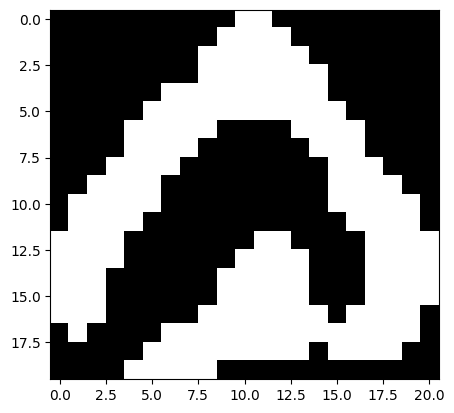

In [ ]:
plt.imshow(X_train_orginal[1], cmap='gray')
plt.show()

In [ ]:
#resize the image from ** to (5,5)
X_train_5by5 = [resize(img, (5, 5)) for img in X_train_orginal]
X_test_5by_5 = [resize(img, (5, 5)) for img in X_test_original]
#reshape
X_train = [x.reshape(25) for x in X_train_5by5]
X_test = [x.reshape(25) for x in X_test_5by_5]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

sample = 999

X = [X_test[sample]]

predicted_class = neigh.predict(X)
actual_class = y_test[sample]

print ("Sample {} is a {}, and you prediction is: {}.".format(sample, actual_class, predicted_class[0]))

acc = neigh.score(X_test, y_test)
print ("Accuracy is %.3f %%" %(acc*100))


Sample 999 is a 6, and you prediction is: 6.
Accuracy is 97.300 %


Text(0, 0.5, 'Error Rate')

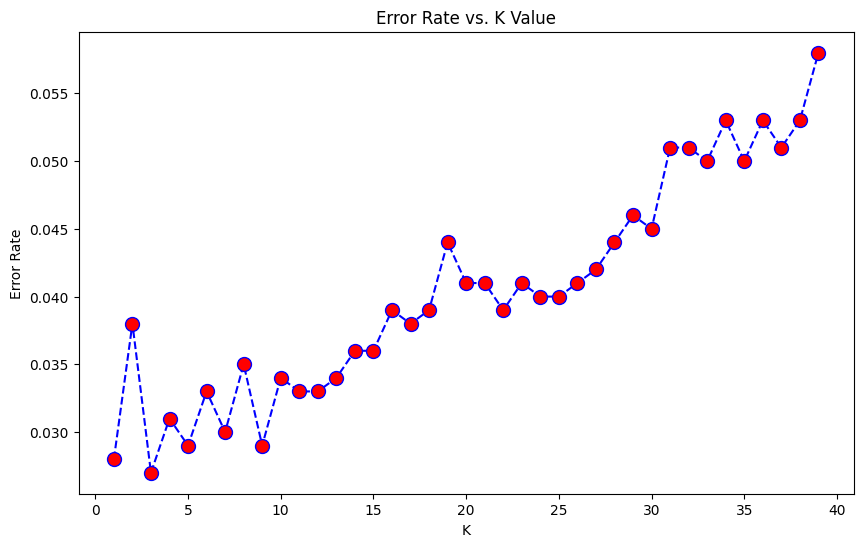

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
y_pred = neigh.predict(X_test)


print("Predicted classes is:")
print(y_pred)
print("==========================================================================")
print("True classes is:")
print(y_test)

Predicted classes is:
[0 3 8 2 0 9 4 1 8 8 0 1 7 6 1 9 4 5 0 2 7 7 9 0 7 9 8 6 3 0 6 9 3 2 7 5 4
 2 5 2 7 7 5 0 8 9 5 8 8 4 7 3 7 7 3 9 9 7 4 6 8 8 8 8 5 1 2 7 4 5 0 3 5 4
 2 3 0 3 1 7 5 3 7 6 9 9 7 4 5 6 2 2 4 4 6 0 9 2 5 4 8 7 7 8 3 2 9 9 5 6 7
 9 7 2 0 0 8 3 3 4 6 7 3 8 2 9 8 1 8 6 4 7 5 8 8 0 4 1 0 6 1 9 7 9 8 5 4 2
 4 3 0 3 0 2 0 7 3 3 3 4 7 4 5 6 3 6 8 1 2 6 4 5 3 5 1 0 9 2 0 5 1 6 2 9 2
 7 1 3 5 7 3 3 3 7 7 4 7 9 4 3 6 0 6 8 6 6 9 4 0 6 0 7 0 3 6 7 8 6 1 1 3 5
 5 5 7 5 6 7 5 3 7 0 4 6 2 5 5 0 7 0 7 9 1 3 7 0 2 7 4 9 5 7 5 5 1 1 2 8 2
 7 6 9 8 7 6 9 9 2 1 4 3 4 8 9 8 5 5 7 6 0 6 4 7 3 4 6 5 6 6 4 8 9 6 6 6 5
 8 4 6 9 7 9 7 1 9 9 8 8 4 8 1 2 2 4 7 3 9 8 1 3 2 3 2 0 3 2 4 4 2 0 9 1 0
 6 0 9 8 7 8 5 9 2 3 8 0 1 3 0 0 8 5 4 0 7 2 8 2 1 4 9 6 3 2 3 4 9 2 7 6 0
 7 5 2 4 7 8 4 1 8 3 3 8 9 9 0 7 2 1 1 7 5 3 9 5 3 6 4 8 8 3 3 7 2 4 7 0 4
 8 3 0 2 5 5 4 2 5 4 4 7 2 5 6 2 5 7 9 7 3 8 2 2 3 8 0 8 8 7 2 8 8 1 3 6 5
 3 7 7 7 7 8 1 7 8 4 3 6 9 0 3 4 3 8 1 8 7 5 7 7 6 9 3 4 2 7 9 9 2 9 2 3 1
 5 

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_pred,y_test))

[[ 86   2   0   0   0   0   0   0   0   0]
 [  0  91   1   0   0   0   0   0   0   0]
 [  0   0 107   5   0   0   0   1   0   0]
 [  0   0   1  99   8   0   0   0   0   0]
 [  0   0   0   3  89   0   0   0   0   0]
 [  0   0   0   0   0  93   0   0   0   0]
 [  0   1   0   0   0   0  85   0   0   0]
 [  0   0   0   0   0   0   0 118   0   0]
 [  0   0   0   0   0   0   0   0 113   0]
 [  0   1   1   1   0   0   2   0   0  92]]


# Load data set

In [1]:
import os, sys
import numpy as np
import pandas as pd
import six.moves.cPickle as pickle
import gzip
import time
import scipy.misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [2]:
import os
import cv2
import numpy as np
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import scipy.io

%cd '/content/drive/My Drive'

Hoda = scipy.io.loadmat('Data_hoda_full.mat')

/content/drive/My Drive


In [4]:
from ast import main
import numpy as np

# Assuming you have the data stored in a file named 'hoda_data_full.npz'
# Make sure the file is in the same directory as your Python script or provide the correct path.

# Step 1: Load the data
Data = Hoda['Data']
labels = Hoda['labels']

# Step 2: Separate the data
main_data_cells = Data[:4000]
main_labels = labels[:4000]

train_labels=main_labels[:3000]
test_labels=main_labels[3000:4000]


In [5]:
# Step 1: Find maximum height and maximum width
max_height = max(np.max(main_data_cells[i][0].shape[0]) for i in range(main_data_cells.shape[0]))
max_width = max(np.max(main_data_cells[i][0].shape[1]) for i in range(main_data_cells.shape[0]))
print(max_height)
print(max_width)



54
45


In [6]:
import numpy as np

# Assuming you have loaded your data into 'Data' and 'labels' arrays
# Assuming each element of Data is a cell containing an array

# Step 2: Initialize an array to store centralized images
max_height = 0
max_width = 0

# Step 3: Centerize the images

for i in range(4000):
    max_height = max(max_height, main_data_cells[i][0].shape[0])
    max_width = max(max_width, main_data_cells[i][0].shape[1])

centered_main_data = np.zeros((4000, max_height, max_width), dtype=np.uint8)

for i in range(4000):
    h_offset = (max_height - main_data_cells[i][0].shape[0]) // 2
    w_offset = (max_width - main_data_cells[i][0].shape[1]) // 2
    centered_main_data[i, h_offset:h_offset+main_data_cells[i][0].shape[0], w_offset:w_offset+main_data_cells[i][0].shape[1]] = main_data_cells[i][0]

centered_train_data=centered_main_data[:3000]
centered_test_data=centered_main_data[3000:4000]


# Now, 'centered_train_data' and 'centered_test_data' contain the centralized images.


Feature extraction

In [7]:
def zoning_feature_extraction(image):
    # Assuming 'image' is a 2D array representing an image
    h, w = image.shape
    mid_h, mid_w = h // 2, w // 2

    # Divide the image into four zones
    top_left_zone = image[:mid_h, :mid_w]
    top_right_zone = image[:mid_h, mid_w:]
    bottom_left_zone = image[mid_h:, :mid_w]
    bottom_right_zone = image[mid_h:, mid_w:]

    # Calculate mean intensity for each zone
    mean_top_left = np.mean(top_left_zone)
    mean_top_right = np.mean(top_right_zone)
    mean_bottom_left = np.mean(bottom_left_zone)
    mean_bottom_right = np.mean(bottom_right_zone)

    # Return the features as a list
    features = [mean_top_left, mean_top_right, mean_bottom_left, mean_bottom_right]

    return features

def zoning_feature_extraction2(image):
    h, w = image.shape
    num_rows = 5
    num_cols = 5
    step_h = h // num_rows
    step_w = w // num_cols

    features = []

    for i in range(num_rows):
        for j in range(num_cols):
            zone = image[i*step_h:(i+1)*step_h, j*step_w:(j+1)*step_w]
            mean_intensity = np.mean(zone)
            features.append(mean_intensity)

    return features

# Example usage for one image
image_features = zoning_feature_extraction2(centered_train_data[0])
print(image_features)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 70.83333333333333, 14.166666666666666, 48.166666666666664, 0.0, 0.0, 79.33333333333333, 167.16666666666666, 14.166666666666666, 0.0, 0.0, 34.0, 70.83333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [8]:
def vertical_histogram_feature_extraction(image):
    # Assuming 'image' is a 2D array representing an image
    vertical_histogram = np.sum(image, axis=0)
    return vertical_histogram.tolist()

def horizontal_histogram_feature_extraction(image):
    # Assuming 'image' is a 2D array representing an image
    horizontal_histogram = np.sum(image, axis=1)
    return horizontal_histogram.tolist()

# Example usage for one image
vertical_histogram = vertical_histogram_feature_extraction(centered_train_data[0])
horizontal_histogram = horizontal_histogram_feature_extraction(centered_train_data[0])

print("Vertical Histogram:")
print(vertical_histogram)

print("\nHorizontal Histogram:")
print(horizontal_histogram)


Vertical Histogram:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1530, 2550, 2805, 2295, 3060, 4335, 4335, 3825, 3060, 2550, 2295, 1785, 1785, 1530, 1530, 1530, 1530, 1275, 1020, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Horizontal Histogram:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 510, 1020, 1785, 2295, 2040, 2040, 2295, 2040, 2550, 2550, 3825, 3570, 3060, 2295, 1275, 1020, 1275, 1020, 1275, 1020, 1020, 1020, 765, 1020, 1020, 765, 510, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [23]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming you have zoning features extracted for both training and test data

# Define zoning feature extraction function


# Assuming 'centered_train_data' and 'centered_test_data' are already defined

# Extract zoning features for training and test data
zoning_train_features = [zoning_feature_extraction2(image) for image in centered_train_data]
zoning_test_features = [zoning_feature_extraction2(image) for image in centered_test_data]

# Flatten the features
flattened_train_features = np.array(zoning_train_features)
flattened_test_features = np.array(zoning_test_features)

train_labels = train_labels.ravel()
test_labels = test_labels.ravel()



In [10]:
print(flattened_train_features.shape)

(3000, 25)



# Handritten recignition with RBF

# Step 1: K-Means Algorithm

In [ ]:
class Kmeans:
    def __init__(self, k, data, no_iter=100, optimized=True):
        self.k = k
        total_loss = []
        # Random initialization
        cluster_centers = np.random.random([k, data.shape[-1]])
        # Calculate Distance of each point to every cluster centers.
        dist_vec = np.zeros([k, data.shape[0]])
        cur = 0
        while(cur < no_iter):
            for idx, _center in enumerate(cluster_centers):
                dist_vec[idx] = np.sum(np.square(np.subtract(np.broadcast_to(_center, data.shape), data)), axis=1) # (50000, )
            # Determine Argmin center
            labels = np.argmin(dist_vec, axis=0)
            loss = 0
            for idx in range(k):
                # Check Cluster Balance
                if data[labels == idx].shape[0] < 2: # Degrees should be greater than 0
                    cluster_centers = np.random.random([k, data.shape[-1]])
                    cur = -1
                    break
                # Calculate Loss J
                loss += np.sum(dist_vec[idx][labels == idx])
                # Update cluster centers
                cluster_centers[idx] = np.average(data[labels == idx], axis=0) # dim 784
            if cur >= 0:
                total_loss.append(loss)
            if optimized and cur > 1 and (total_loss[-1] == total_loss[-2]):
                break
            cur += 1
        print('Iterations: {}'.format(len(total_loss)))
        self.centers, self.labels, self.total_loss = cluster_centers, labels, total_loss

    def predict(self, data):
        dist_vec = np.zeros([self.k, data.shape[0]])
        for idx, _center in enumerate(self.centers):
            dist_vec[idx] = np.sum(np.square(np.subtract(np.broadcast_to(_center, data.shape), data)), axis=1) # (50000, )
        return np.argmin(dist_vec, axis=0)


Classifier

In [5]:
class RBFClassifier:
    def init(self, X_train, y_train, X_test, y_test, num_of_classes, k_range, learning_rate=0.001, max_iter=3000, tol=1e-4, regularization=0.01):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.num_of_classes = num_of_classes
        self.k_range = k_range
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.regularization = regularization

    def convert_to_one_hot(self, x, num_of_classes):
        return np.eye(num_of_classes)[x]

    def fit(self):
        print("Start fitting your RBF...")
        best_k, best_score = self.select_best_k()
        print("Best K and score:", best_k, best_score)

        kmeans = KMeans(n_clusters=best_k)
        kmeans.fit(self.X_train)
        centroids = kmeans.cluster_centers_
        std_list = np.std(kmeans.transform(self.X_train), axis=0)

        RBF_X_train = self.rbf_list(self.X_train, centroids, std_list)

        scaler = StandardScaler()
        RBF_X_train = scaler.fit_transform(RBF_X_train)

        self.w = np.random.randn(RBF_X_train.shape[1], self.num_of_classes)  # Random initialization of weights

        for _ in range(self.max_iter):
            pred_y_train = RBF_X_train @ self.w
            error = self.convert_to_one_hot(self.y_train, self.num_of_classes) - pred_y_train

            error = error / np.linalg.norm(error)

            self.w += self.learning_rate * RBF_X_train.T @ error

            if np.linalg.norm(self.learning_rate * RBF_X_train.T @ error) < self.tol:
                break

        print("RBF was trained.")
        RBF_X_test = self.rbf_list(self.X_test, centroids, std_list)
        RBF_X_test = scaler.transform(RBF_X_test)  # Apply the same transformation to the test set
        self.pred_y_test = RBF_X_test @ self.w
        self.pred_y_test = np.argmax(self.pred_y_test, axis=1)


    def rbf(self, x, c, s):
        distance = np.linalg.norm(x - c)
        return np.exp(-distance / (2 * s ** 2))

    def rbf_list(self, X, centroids, std_list):
        RBF_list = []
        for x in X:
            RBF_list.append([self.rbf(x, c, s) for (c, s) in zip(centroids, std_list)])
        return np.array(RBF_list)

    def select_best_k(self):
        best_k = None
        best_score = -float('inf')
        scores = []
        for k in self.k_range:
            kmeans = KMeans(n_clusters=k)
            kmeans.fit(self.X_train)
            score = self.calculate_cvi(kmeans)
            scores.append((k, score))
            if score > best_score:
                best_score = score
                best_k = k
        print("Scores for different Ks:", scores)
        return best_k, best_score

    def calculate_cvi(self, kmeans):
        labels = kmeans.labels_
        score = silhouette_score(self.X_train, labels)
        return score

In [4]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Extract zoning features for training and test data
zoning_train_features = [zoning_feature_extraction2(image) for image in centered_train_data]
zoning_test_features = [zoning_feature_extraction2(image) for image in centered_test_data]

# Flatten the features
flattened_train_features = np.array(zoning_train_features)
flattened_test_features = np.array(zoning_test_features)


# Define other parameters
num_of_classes = 10
K_range = np.array([5, 10, 15, 20,25,30,35,40,45,50,55,60])


# Create an instance of the RBFClassifier
rbf_classifier = RBFClassifier(X_train=zoning_train_features, y_train=train_labels, X_test=flattened_test_features, y_test=test_labels, num_of_classes=10, k_range=K_range)

# Call the fit method to train the model
rbf_classifier.fit()

# Access the predicted labels on the test set
predicted_labels = rbf_classifier.pred_y_test


In [3]:
print("#########################################################")
print("#########  Accuracy: ", accuracy_score(test_labels, y_pred),"   ##########")
print("#########################################################")


#########################################################
#########  Accuracy:  80.3    ##########
#########################################################


In [17]:
from sklearn.cluster import KMeans
best_k=10
kmeans = KMeans(n_clusters=best_k)
kmeans.fit(flattened_train_features)
centroids = kmeans.cluster_centers_
std_list = np.std(kmeans.transform(flattened_train_features), axis=0)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


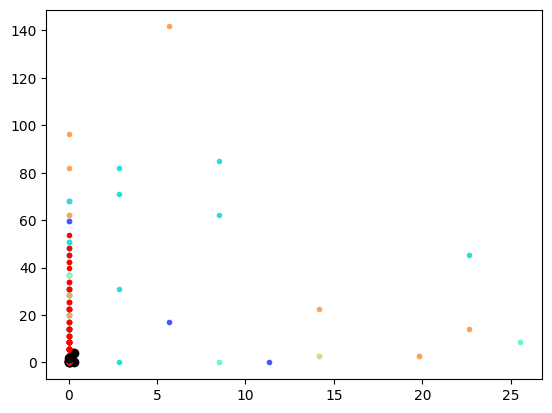

In [18]:
fig = plt.figure
color=iter(cm.rainbow(np.linspace(0,1,best_k)))
pred = kmeans.predict(flattened_train_features)
for i in range(best_k):
    c = next(color)
    plt.plot(flattened_train_features[pred == i][:,0], flattened_train_features[pred == i][:,1], '.', c=c)
    plt.plot(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], 'ko')

In [25]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn import linear_model


In [2]:
clf = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0), warm_start=True, n_jobs=-1)
clf = clf.fit(flattened_train_features, train_labels)
y_pred = clf.predict(flattened_test_features)
print("#########################################################")
print("#########  Accuracy: ", accuracy_score(test_labels, y_pred),"   ##########")
print("#########################################################")


#########################################################
#########  Accuracy:  83.6    ##########
#########################################################
